In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

In [3]:
# Importing the plant configuration from the site_config.csv
site_config = pd.read_csv('../site_config.csv')

interest = 1
site_config = site_config.loc[interest]
site_config

Plant_name                                                Narnaul
Latitude                                                  28.1002
Longitude                                                   75.99
Timezone                                            Asia/Calcutta
Elev                                                          315
surface_tilt                                                   40
surface_azimuth                                                 0
albedo                                                        0.2
series_modules                                                 20
parallel_modules                                              172
module_name                     Vikram_Solar_Eldora_VSP_72_315_03
module_count                                                 3440
module_wattage                                                315
inverter_name       ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_
inverter_count                                                  1
inv_pmax  

In [4]:
# load some module and inverter specifications
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')
cec_module = cec_modules[site_config.module_name]
cec_inverter = cec_inverters[site_config.inverter_name]
sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

In [5]:
location = Location(site_config.Latitude,site_config.Longitude,
							site_config.Timezone,site_config.Elev, site_config.Plant_name)
# location = Location(latitude=26, longitude=76)
location

Location: 
  name: Narnaul
  latitude: 28.100240000000003
  longitude: 75.99
  altitude: 315
  tz: Asia/Calcutta

In [6]:
system = PVSystem(surface_tilt=site_config.surface_tilt,
                  surface_azimuth=site_config.surface_azimuth,
                  albedo=0.25,
                  module=site_config.module_name,
                  module_parameters=cec_module,
                  modules_per_string=site_config.series_modules,
                  strings_per_inverter=site_config.parallel_modules,
                  inverter='ABB PVS800',
                  inverter_parameters=cec_inverter,
                  racking_model='open_rack_cell_glassback',
                  model='cec', name='Narnaul')
# system.module_parameters = system.module_parameters.append(pd.Series([1, -0.002438, 0.00031, -1.246E-05, 2.11E-07, -1.36E-09], index=['B0','B1','B2','B3','B4','B5']))
# system.module_parameters

In [7]:
mc = ModelChain(system, location, orientation_strategy='south_at_custom',dc_model='cec', clearsky_model='ineichen', transposition_model='haydavies',
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',ac_model=None, aoi_model='no_loss',spectral_model='no_loss',
                temp_model='sapm',losses_model='no_loss', name=location.name+'_Modelchain')
mc

ModelChain: 
  name: Narnaul_Modelchain
  orientation_strategy: south_at_custom
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temp_model: sapm_temp
  losses_model: no_extra_losses

In [8]:
# Importing the weather data
weather = pd.read_csv('../Narnaul_site/data/weather_data/selected_data.csv', index_col='Timestamp')

In [9]:
weather.index = pd.to_datetime(weather.index.values)
weather.index = weather.index.tz_localize('Asia/Kolkata')
mc.run_model(times=weather.index, weather=weather)

ModelChain: 
  name: Narnaul_Modelchain
  orientation_strategy: south_at_custom
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temp_model: sapm_temp
  losses_model: no_extra_losses

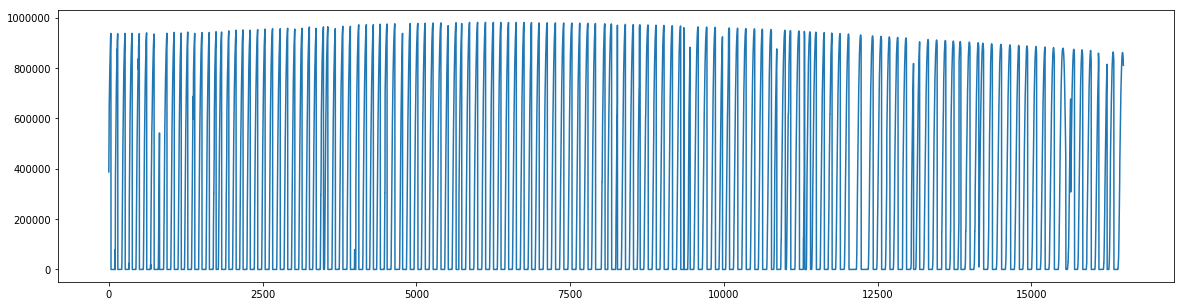

In [10]:
plt.figure(figsize=[20,5])
plt.plot(mc.dc.p_mp.values)

In [13]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2017-12-18 08:30:00+05:30,577.031067,855.677335,535.224255,724.157125,387586.457632,569.558984,421.054984
2017-12-18 08:35:00+05:30,617.660634,855.203888,572.729579,722.599944,413854.361627,609.669436,449.263104
2017-12-18 08:40:00+05:30,657.248568,854.593451,609.258045,720.928478,439231.475538,648.753806,476.591227
2017-12-18 08:50:00+05:30,733.420527,853.068271,679.516790,717.334614,487440.914384,723.963233,528.781458
2017-12-18 09:05:00+05:30,840.572914,850.292970,778.170140,711.719069,553838.527530,829.776128,601.081306
2017-12-18 09:20:00+05:30,939.689294,847.215308,869.141590,706.143493,613738.678226,927.668686,666.628321
2017-12-18 09:25:00+05:30,971.007605,846.159000,898.082679,704.118799,632356.897402,958.603315,687.626193
2017-12-18 09:30:00+05:30,1001.480777,845.097033,925.697573,702.528787,650329.192893,988.704531,706.822522
2017-12-18 09:35:00+05:30,1031.114856,844.034056,953.128719,700.503735,667670.227382,1017.978180,726.671391
2017-12-18 09:40:00+05:30,1059.914191,842.974173,979.215979,698.919549,684393.190831,1046.428437,744.686327
